In [1]:
import io
from IPython.nbformat import current

def execute_notebook(nbfile):
    
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    
    ip = get_ipython()
    
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)


C:\ProgramData\Anaconda3\envs\mokshtech\lib\site-packages\IPython\nbformat.py:12: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  warn("The `IPython.nbformat` package has been deprecated since IPython 4.0. "
C:\ProgramData\Anaconda3\envs\mokshtech\lib\site-packages\nbformat\current.py:15: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  warnings.warn("""nbformat.current is deprecated.


In [2]:

execute_notebook("util.ipynb")

C:\Users\sanjo\PycharmProjects\mokshtech\stock_predictor\optionvaluecalculation\strategies
['.ipynb_checkpoints', 'BANKNIFTYmonthly_option_buy_Bhavcopy_Pandl.csv', 'BANKNIFTYmonthly_option_buy_nsepy_Pandl.csv', 'BANKNIFTYoption_buy_nsepy_Pandl.csv', 'df.csv', 'forwordvolatility.py', 'input.csv', 'monthlyoptionbuying-addingsellleg.ipynb', 'monthlyoptionbuying.ipynb', 'monthy_nifty_option_buy_Bhavcopy_Pandl.csv', 'monthy_nifty_option_buy_nsepy_Pandl.csv', 'NIFTY.csv', 'optionPriceTrendAnalysis.ipynb', 'preDefinedStrategies', 'straddle.py', 'strategies.py', 'util.ipynb', 'util.py', 'weeklyOptionBuy.ipynb', 'weeklyOptionBuy_Selladditon.ipynb', 'weekly_banknifty_option_buy_Pandl.csv', 'weekly_nifty_option_buy_Pandl.csv', '__init__.py']
['2021-01-07', '2021-01-14', '2021-01-21', '2021-01-28', '2021-02-04', '2021-02-11', '2021-02-18', '2021-02-25', '2021-03-04', '2021-03-10', '2021-03-18', '2021-03-25']
['2021-01-28', '2021-02-25', '2021-03-25']
2021-01-07 00:00:00
2021-01-01 00:00:00
2021-01

In [3]:
def addLongLeg(tradebook,symbol, buydate, sellDate,optionType,strikePrice,ExpiryDate,matchid,isLong):
    
    print("Params",symbol, buydate, sellDate,optionType,strikePrice,ExpiryDate,matchid,isLong)
    
    buy_opt_ce = nsepy.get_history(symbol=symbol,
                                        start=buydate,
                                        end=buydate,
                                        index=True,
                                        option_type=optionType,
                                        strike_price=strikePrice,
                                        expiry_date=ExpiryDate)

    sell_opt_ce = nsepy.get_history(symbol=symbol,
                                    start=sellDate,
                                    end=sellDate,
                                    index=True,
                                    option_type=optionType,
                                    strike_price=strikePrice,
                                    expiry_date=expiry_day)
    print("Think,Think")
    print("think",buy_opt_ce['Open'].item, buy_opt_ce['Low'].item,sell_opt_ce['Open'].item,sell_opt_ce['Low'].item)

    if not (buy_opt_ce['Open'].item==0 or buy_opt_ce['Low'].item==0 or sell_opt_ce['Open'].item==0 or sell_opt_ce['Low'].item==0 ):
        tradebook.addTradeLeg(buy_opt_ce,matchid,isLong)
        tradebook.addTradeLeg(sell_opt_ce,matchid,isLong)
        print("in tradebook add condition")
  


def getExpirtyDate():
    expirty_Date  =[]
    start_date = datetime.date(2019, 4, 1)
    end_date = datetime.date(2021, 4, 30)
    delta = relativedelta(months=+1)
    while start_date <= end_date: 
        #max(nsepy.get_expiry_date(start_date.year,start_date.month)))
        #expirty_Date.extend(sorted(list(nsepy.get_expiry_date(start_date.year,start_date.month))))
        expirty_Date.append(max(nsepy.get_expiry_date(start_date.year,start_date.month)))
        start_date += delta
    return expirty_Date
    
    
def getStrikeValue():
    symbol = 'NIFTY'
    expiry_list = getExpirtyDate()
    previous_expiry_date = expiry_list[200]
    current_expiry_date = expiry_list[203]
    print(previous_expiry_date)
    print(current_expiry_date)
    #identiy next working day after previous expiry day
    start_date = previous_expiry_date+timedelta(days =1)
    print(start_date)

    nifty_fut = nsepy.get_history(symbol="NIFTY",
                            start=start_date,
                            end=start_date,
                            index=True,
                            futures=True,
                            expiry_date=current_expiry_date)
    print(nifty_fut)

In [4]:
def StratergyusingNsePy():
        

        banknifty = pd.DataFrame()
        formatted_banknifyt_df = pd.DataFrame(['Year_month','P&L'])
        profit_loss = pd.DataFrame()
        delta = relativedelta(years=+1)
        # code using nsepy to make sure its bhavcopy is giving matching result
        tradebook = TradeBook()
        for current_expiry_date in  allexpiry_list:
            
            print(current_expiry_date)
            try:
                val =0
                expiry_day = datetime.datetime.strptime(current_expiry_date,'%Y-%m-%d')
                today_date =datetime.datetime.strptime( str(date.today()),'%Y-%m-%d')
                if expiry_day < today_date:
                    #print(expiry_day)
                    #either week or month based on funcation call
                    first_day_of_trade = expiry_day.replace(day=1)
                    #print("first_day_of_trade1",first_day_of_trade)
                    first_day_of_trade =checkfirstTradyingDayofMonth(first_day_of_trade,expiry_day)
                    #print("first_day_of_trade",first_day_of_trade)
                    nifty_fut =  nsepy.get_history(symbol=symbol,
                                       start=first_day_of_trade,
                                       end=first_day_of_trade,
                                       index=True)
                    strike_price = (nifty_fut['Open']- (nifty_fut['Open'])%100).astype(float).min()
                    #print("strike_price",strike_price)
                    fifteen_day_of_the_month = expiry_day.replace(day=15)
                    #print("fifteen_day_of_the_month",fifteen_day_of_the_month)

                    fifteen_day_of_the_month =checkfirstTradyingDayofMonth(fifteen_day_of_the_month,expiry_day)
                    fifteen_day_of_the_month =expiry_day

                    #buy_opt_ce = nsepy.get_history(symbol=symbol,
                    #                    start=first_day_of_trade,
                    #                    end=first_day_of_trade,
                    #                    index=True,
                    #                    option_type='CE',
                    #                    strike_price=strike_price,
                    #                    expiry_date=expiry_day)




                    #buy_opt_pe = nsepy.get_history(symbol=symbol,
                    #                    start=first_day_of_trade,
                    #                    end=first_day_of_trade,
                    #                    index=True,
                    #                    option_type='PE',
                    #                    strike_price=strike_price,
                    #                    expiry_date=expiry_day)
                   

                    #sell_opt_ce = nsepy.get_history(symbol=symbol,
                    #                    start=fifteen_day_of_the_month,
                    #                    end=fifteen_day_of_the_month,
                    #                    index=True,
                    #                    option_type='CE',
                    #                    strike_price=strike_price,
                    #                    expiry_date=expiry_day)
                    #sell_opt_pe = nsepy.get_history(symbol=symbol,
                    #                    start=fifteen_day_of_the_month,
                    #                    end=fifteen_day_of_the_month,
                    #                    index=True,
                    #                    option_type='PE',
                    #                    strike_price=strike_price,
                    #                    expiry_date=expiry_day)
                    addLongLeg(tradebook,symbol, first_day_of_trade, fifteen_day_of_the_month,"CE",strike_price,expiry_day,1,True)
                    #addLongLeg(tradebook,symbol, first_day_of_trade, fifteen_day_of_the_month,"PE",strike_price,expiry_day,2,True)
                    vixsma= getVixData(first_day_of_trade)
                    strikeadditon =500
                    if vixsma> 15:
                        strikeadditon =1000
                    
                    
                    add_leg_opt_pe_sell = nsepy.get_history(symbol=symbol,
                                        start=first_day_of_trade,
                                        end=first_day_of_trade,
                                        index=True,
                                        option_type='PE',
                                        strike_price=strike_price-strikeadditon,
                                        expiry_date=expiry_day)
                    add_leg_opt_pe_buy = nsepy.get_history(symbol=symbol,
                                        start=fifteen_day_of_the_month,
                                        end=fifteen_day_of_the_month,
                                        index=True,
                                        option_type='PE',
                                        strike_price=strike_price-strikeadditon,
                                        expiry_date=expiry_day)
                    add_leg_opt_ce_sell = nsepy.get_history(symbol=symbol,
                                        start=first_day_of_trade,
                                        end=first_day_of_trade,
                                        index=True,
                                        option_type='CE',
                                        strike_price=strike_price+strikeadditon,
                                        expiry_date=expiry_day)
                    add_leg_opt_ce_buy = nsepy.get_history(symbol=symbol,
                                        start=fifteen_day_of_the_month,
                                        end=fifteen_day_of_the_month,
                                        index=True,
                                        option_type='CE',
                                        strike_price=strike_price+strikeadditon,
                                        expiry_date=expiry_day)
                    
                    

                    #tradebook.addTradeLeg(buy_opt_ce,1,True)
                    #tradebook.addTradeLeg(sell_opt_ce,1,True)
                    #tradebook.addTradeLeg(buy_opt_pe,2,True)
                    #tradebook.addTradeLeg(sell_opt_pe,2,True)
                    #tradebook.addTradeLeg(add_leg_opt_pe_sell,3,False)
                    #tradebook.addTradeLeg(add_leg_opt_pe_buy,3,False)
                    #tradebook.addTradeLeg(add_leg_opt_ce_sell,4,False)
                    #tradebook.addTradeLeg(add_leg_opt_ce_buy,4,False)


                    

            except Exception as error:
                print("File not found {0}".format(error))
       
        tradebook.printTradeBook()
        tradebook.calcualteMonthProfitLoss()
        print(tradebook.month_profit_loss.Total_PandL.sum())
        #print(month_profit_loss.Total_PandL)
        #print(tradebook.month_profit_loss.groupby('Sell_date').agg({'Total_PandL' :sum}))
        profit_loss=tradebook.month_profit_loss
        return profit_loss


2021-01-07
Params BANKNIFTY 2021-01-01 00:00:00 2021-01-07 00:00:00 CE 31200.0 2021-01-07 00:00:00 1 True
Think,Think
think <bound method IndexOpsMixin.item of Date
2021-01-01    473.05
Name: Open, dtype: float64> <bound method IndexOpsMixin.item of Date
2021-01-01    376.25
Name: Low, dtype: float64> <bound method IndexOpsMixin.item of Date
2021-01-07    857.8
Name: Open, dtype: float64> <bound method IndexOpsMixin.item of Date
2021-01-07    718.45
Name: Low, dtype: float64>
in tradebook add condition
2021-01-14
Params BANKNIFTY 2021-01-01 00:00:00 2021-01-14 00:00:00 CE 31200.0 2021-01-14 00:00:00 1 True
Think,Think
think <bound method IndexOpsMixin.item of Date
2021-01-01    699.0
Name: Open, dtype: float64> <bound method IndexOpsMixin.item of Date
2021-01-01    600.0
Name: Low, dtype: float64> <bound method IndexOpsMixin.item of Series([], Name: Open, dtype: object)> <bound method IndexOpsMixin.item of Series([], Name: Low, dtype: object)>
in tradebook add condition
2021-01-21
Para

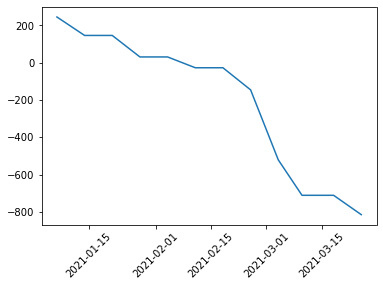

In [5]:
    profit_loss_main =StratergyusingNsePy()
    
    #print(month_profit_loss_main)
    
    profit_loss= profit_loss_main.groupby('Sell_date').agg({'Total_PandL' :sum})
    #print("----Monthly---------")
    
    plt.xticks(rotation=45)
    profit_loss['Cum_PandL'] = profit_loss['Total_PandL'].cumsum()
    #print("----Monthly After cumsum---------")
    #print(month_profit_loss)
    plt.plot(profit_loss.index , profit_loss['Cum_PandL'])
    plt.show()
    pandlFile =str(symbol)+"option_buy_nsepy_Pandl.csv"
    profit_loss.to_csv(pandlFile)

In [6]:
amount = 400000
sellonelotamountperunit = 1000


profit_loss_main["amount_to_invest"] = amount
test =dict()
forTest = profit_loss_main

profit_loss_group= profit_loss_main.groupby(['Sell_date','Trade_Type'])
for name , group in profit_loss_group:
    #print(name[1])
    #print(group)
    if name[1]=='Long':
       
        print ("in long",name)
        totalprice = group['Buy_Price'].sum()
    
        print(totalprice)
        print("Totalunit",int(amount/(totalprice)))
        test.update({name[0]:[name[0],int(amount/(totalprice))]})  
    
    else: 
       
        #print ("in long")
        totalprice = group['Buy_Price'].sum()
        print(totalprice)
        print("Totalunit",int(amount/(totalprice+sellonelotamountperunit)))
        test.update({name[0]:[name[0],int(amount/(totalprice+sellonelotamountperunit))]})
        
#print(test)
test1 =pd.DataFrame(test)
test1= test1.transpose()
test1.columns = ['Sell_date','Units']


profit_loss_main =pd.merge(profit_loss_main, test1, on = 'Sell_date', how = "outer")
print(profit_loss_main)


#month_profit_loss_main["Total_PandL_for_all_contracts"] = month_profit_loss_main.apply(lambda x: (x.Total_PandL*x.Units*sellonelotamountperunit)if x.Trade_Type=='Short' else (x.Total_PandL*x.Units), axis=1)
profit_loss_main["Total_PandL_for_all_contracts"] = profit_loss_main.apply(lambda x:x.Total_PandL*x.Units, axis=1)
#print("Total")
#print(month_profit_loss_main)
#print(month_profit_loss_main["Total_PandL_for_all_contracts"].sum().astype(float))

profit_loss_main['Year_month'] = pd.to_datetime(profit_loss_main['Sell_date']).dt.strftime('%Y')
print(profit_loss_main.groupby('Year_month')["Total_PandL_for_all_contracts"].sum().astype(float))
print(len(profit_loss_main.groupby('Year_month')))
result =cagr(amount,profit_loss_main["Total_PandL_for_all_contracts"].sum().astype(float),len(profit_loss_main.groupby('Year_month')))
print("{:.2%}".format(result))



in long (datetime.date(2021, 1, 7), 'Long')
473.05
Totalunit 845
in long (datetime.date(2021, 1, 14), 'Long')
699.0
Totalunit 572
in long (datetime.date(2021, 1, 21), 'Long')
0.0


<ipython-input-6-1c3ea1e23768>:19: RuntimeWarning: divide by zero encountered in double_scalars
  print("Totalunit",int(amount/(totalprice)))


OverflowError: cannot convert float infinity to integer

In [ ]:
profit_loss_main.loc[profit_loss_main["Total_PandL_for_all_contracts"] ==profit_loss_main["Total_PandL_for_all_contracts"].max()]

In [ ]:
### gkk = profit_loss_main.groupby(["Trade_Type"])
print(gkk['Total_PandL'].sum())
for name ,group in gkk:
    print(group)


In [ ]:
400000/1893


